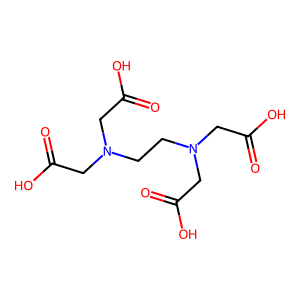

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

smiles = 'C(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O'
smiles1 = 'CC(O)=O'
mol = Chem.MolFromSmiles(smiles)
mol1 = Chem.MolFromSmiles(smiles1)

img = Draw.MolToImage(mol)
display(img)

In [2]:
from rdkit.Chem import Descriptors

print(f"Peso molecular: {Descriptors.MolWt(mol)} g/mol")
print(f"LogP: { Descriptors.MolLogP(mol):.2f}")


Peso molecular: 292.24399999999997 g/mol
LogP: -2.07


In [3]:
from rdkit.Chem import AllChem
from rdkit import DataStructs

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)

similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
print(f"Similaridade: {similarity:.2f}")

Similaridade: 0.24


[02:23:12] DEPRECATION WARNING: please use MorganGenerator
[02:23:12] DEPRECATION WARNING: please use MorganGenerator


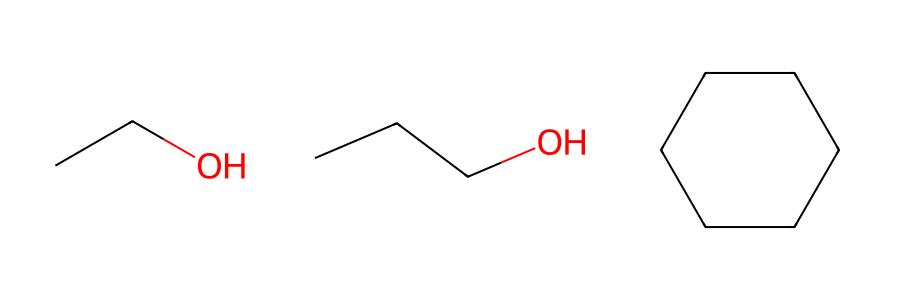

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

# Moléculas de exemplo
mols = [Chem.MolFromSmiles(smiles) for smiles in ["CCO", "CCCO", "C1CCCCC1"]]  # Etanol, Propanol, Ciclohexano

# Desenhar múltiplas moléculas
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300))

# Exibir a imagem
display(img)

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

mol = Chem.AddHs(mol)  # Adicionar hidrogênios

# Gerar conformação 3D
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

# Visualizar a conformação 3D com py3Dmol
view = py3Dmol.view(width=800, height=300)
view.addModel(Chem.MolToMolBlock(mol), 'mol')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# Molécula e subestrutura
substructure = Chem.MolFromSmiles("C(O)=O")  # Grupo hidroxila

# Verificar se a subestrutura está presente
print("Subestrutura presente?", mol.HasSubstructMatch(substructure))

Subestrutura presente? True


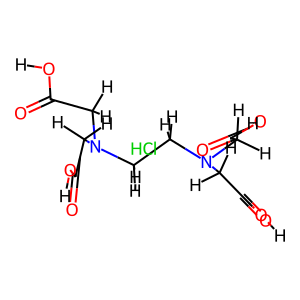

In [7]:
# Adicionar um átomo de cloro
edit_mol = Chem.RWMol(mol)
edit_mol.AddAtom(Chem.Atom(17))  # Cloro
edit_mol.AddBond(20, 21, Chem.BondType.SINGLE)  # Ligar o cloro ao carbono

# Visualizar a nova molécula
img = Draw.MolToImage(edit_mol)
display(img)

In [8]:
from rdkit.Chem import AllChem

# Definir uma reação (exemplo: formação de éster)
rxn = AllChem.ReactionFromSmarts("[C:1](=[O:2])-[OH:3].[OH:4]-[C:5]>>[C:1](=[O:2])-[O:3]-[C:5]")

# Moléculas de entrada
reactants = [Chem.MolFromSmiles("CC(=O)O"), Chem.MolFromSmiles("CO")]  # Ácido acético + Metanol

# Aplicar a reação
products = rxn.RunReactants(reactants)
for product in products:
    print("Produto:", Chem.MolToSmiles(product[0]))

Produto: COC(C)=O


[02:23:12] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 4 


In [9]:
import pandas as pd
from rdkit.Chem import PandasTools

# Criar um DataFrame com moléculas
data = {"SMILES": ["CCO", "CCCO", "C1CCCCC1"], "Nome": ["Etanol", "Propanol", "Ciclohexano"]}
df = pd.DataFrame(data)

# Adicionar uma coluna com objetos Mol
PandasTools.AddMoleculeColumnToFrame(df, "SMILES")

# Exibir o DataFrame
print(df)

     SMILES         Nome                                              ROMol
0       CCO       Etanol  <rdkit.Chem.rdchem.Mol object at 0x000001FAEFC...
1      CCCO     Propanol  <rdkit.Chem.rdchem.Mol object at 0x000001FAEFC...
2  C1CCCCC1  Ciclohexano  <rdkit.Chem.rdchem.Mol object at 0x000001FAEFC...


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from rdkit.Chem import AllChem

# Exemplo: Classificação de moléculas
mols = [Chem.MolFromSmiles(smiles) for smiles in ["CCO", "CCCO", "C1CCCCC1", "CCOC", "CCN"]]
labels = [0, 0, 1, 1, 0]  # Classes fictícias

# Gerar fingerprints
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in mols]

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(fps, labels, test_size=0.2)

# Treinar um modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Avaliar o modelo
print("Acurácia:", model.score(X_test, y_test))

Acurácia: 0.0


[02:23:20] DEPRECATION WARNING: please use MorganGenerator
[02:23:20] DEPRECATION WARNING: please use MorganGenerator
[02:23:20] DEPRECATION WARNING: please use MorganGenerator
[02:23:20] DEPRECATION WARNING: please use MorganGenerator
[02:23:20] DEPRECATION WARNING: please use MorganGenerator


In [11]:
from rdkit.Chem import EnumerateHeterocycles

# Gerar variações de uma molécula
mol = Chem.MolFromSmiles("CC1=C(C=C(C=C1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-] ")  # Benzeno
variations = EnumerateHeterocycles.EnumerateHeterocycles(mol)

# Visualizar as variações
for variation in variations:
    print(Chem.MolToSmiles(variation))

Cc1c([N+](=O)[O-])cc([N+](=O)[O-])nc1[N+](=O)[O-]
Cc1c([N+](=O)[O-])nc([N+](=O)[O-])nc1[N+](=O)[O-]
Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-]


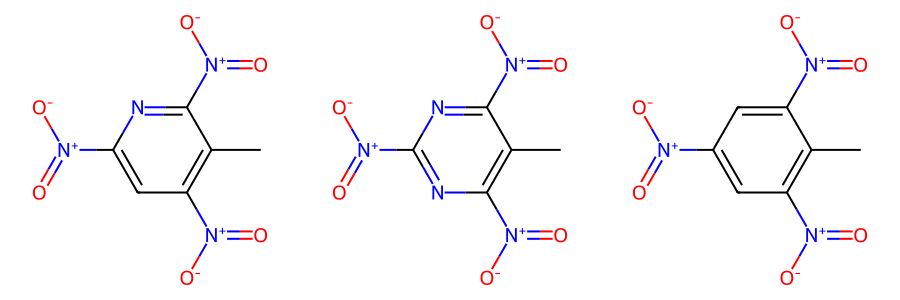

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw

# Moléculas de exemplo
mols = [Chem.MolFromSmiles(smiles) for smiles in ["Cc1c([N+](=O)[O-])cc([N+](=O)[O-])nc1[N+](=O)[O-]", 
                                                  "Cc1c([N+](=O)[O-])nc([N+](=O)[O-])nc1[N+](=O)[O-]", 
                                                  "Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-]"]]    # TNT, DNT, TNT

# Desenhar múltiplas moléculas
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300))

# Exibir a imagem
display(img)

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Criar uma molécula
smiles = "CCO"  # Etanol
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)  # Adicionar hidrogênios

# Gerar múltiplas conformações
AllChem.EmbedMultipleConfs(mol, numConfs=10)

# Calcular as propriedades MMFF
mmff_props = AllChem.MMFFGetMoleculeProperties(mol)

# Otimizar conformações e calcular energias
energias = []
for conf_id in range(mol.GetNumConformers()):
    ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=conf_id)
    ff.Minimize()
    energias.append(ff.CalcEnergy())

print("Energias das conformações:", energias)


Energias das conformações: [-1.5170975763095966, -1.3368570636052861, -1.336857063444068, -1.3368570619398796, -1.3368570632245353, -1.3368570637937356, -1.3368570633359282, -1.3368570640053181, -1.3368570634864492, -1.33685706300676]
